### Load necessary libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [2]:
from sklearn import ensemble

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
##Load original dataset
data_raw=pd.read_csv('C:\\Users\\lenovo\\Desktop\\titanic\\train.csv')
data_val=pd.read_csv('C:\\Users\\lenovo\\Desktop\\titanic\\test.csv')


In [6]:
##Display partial data
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Convert all column names to lowercase
data_raw.columns=data_raw.columns.str.lower();
data_val.columns=data_val.columns.str.lower();

In [10]:
data_val.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

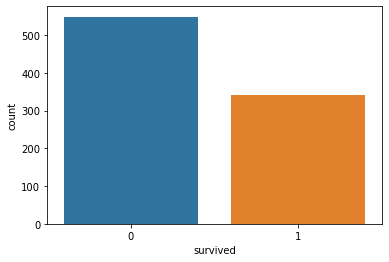

In [11]:
#Draw Graph
sns.countplot(data_raw['survived'])

In [12]:
##Next, to analyze and clean the entire data, we need to merge the two datasets for unified cleaning
data_all = [data_raw,data_val]

In [13]:
##Data cleaning
data_raw.isnull().sum()   ##View empty values in the training set

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [14]:
data_val.isnull().sum() 

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [15]:
##By describing the original dataset, you can see how many pieces of data can be counted in a more detailed description, and how many types, averages, median, modes, and features there are
data_raw.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
for dataset in data_all:
    #Fill in the gap value值
    dataset['age'].fillna(dataset['age'].median(),inplace=True)
    dataset['fare'].fillna(dataset['fare'].median(),inplace=True)
    dataset['embarked'].fillna(dataset['embarked'].mode()[0],inplace=True)

In [17]:
##Delete some fields
drop_columns=['cabin','passengerid','ticket']
data_raw.drop(drop_columns,axis=1,inplace=True)
data_val.drop(drop_columns,axis=1,inplace=True)

In [18]:
#View the results after removing fields
data_raw.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [19]:
data_val.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [20]:
##Step 3: Construct Features
for dataset in data_all:
    #Build new fields
    dataset['famliy_size']=dataset['sibsp']+dataset['parch']+1
    dataset['single']=1
    dataset['single'].loc[dataset['famliy_size']>1]=0
    dataset['title']=dataset['name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
    dataset['fare_bin']=pd.qcut(dataset['fare'],4)#Divided into four groups based on ticket prices
    dataset['age_bin']=pd.cut(dataset['age'].astype(int),5)

F:\ANACONDA\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
F:\ANACONDA\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
dataset.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,famliy_size,single,title,fare_bin,age_bin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


In [22]:
#Count the number of people according to the title
data_raw['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Capt              1
Mme               1
Sir               1
the Countess      1
Ms                1
Lady              1
Don               1
Name: title, dtype: int64

In [23]:
title_names=(data_raw['title'].value_counts()<10)

In [24]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Major            True
Mlle             True
Col              True
Jonkheer         True
Capt             True
Mme              True
Sir              True
the Countess     True
Ms               True
Lady             True
Don              True
Name: title, dtype: bool

In [25]:
#Title: Classify all data with titles less than 10 into one category: other
data_raw['title']=data_raw['title'].apply(lambda x:'other' if title_names[x] else x)

In [26]:
data_raw['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: title, dtype: int64

In [27]:
data_raw['survived'].groupby(data_raw['title']).mean()

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: survived, dtype: float64

In [28]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,famliy_size,single,title,fare_bin,age_bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [29]:
label=LabelEncoder()

In [30]:
for dataset in data_all:
    #(1) New field: sex_ Code
    dataset['sex_code']=label.fit_transform(dataset['sex'])
    #(2) New field: Embarked_ Code
    dataset['embarked_code']=label.fit_transform(dataset['embarked'])
    #(3) New field: title_ Code
    dataset['title_code']=label.fit_transform(dataset['title'])
   #New field: age_ Bin_ Code
    dataset['age_bin_code']=label.fit_transform(dataset['age_bin'])
    #New field: fare_ Bin_ Code
    dataset['fare_bin_code']=label.fit_transform(dataset['fare_bin'])

In [31]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,famliy_size,single,title,fare_bin,age_bin,sex_code,embarked_code,title_code,age_bin_code,fare_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1


In [32]:
#View the names of columns
data_raw.columns.tolist()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'famliy_size',
 'single',
 'title',
 'fare_bin',
 'age_bin',
 'sex_code',
 'embarked_code',
 'title_code',
 'age_bin_code',
 'fare_bin_code']

In [33]:
#Method 1    feature selection
Target=['survived']#Label

In [34]:
data_columns_one=['sex','age','title','sex_code','title_code','age_bin_code']#Filter based on these fields

In [35]:
columns_one=Target+data_columns_one

In [36]:
#Method 2    feature selection
data_columns_two=['sibsp','parch','famliy_size','single']#Filter based on these fields

In [37]:
columns_two=Target+data_columns_two

In [38]:
#Method 3     feature selection
data_columns_three=['pclass','embarked_code','fare_bin_code']#Filter based on these fields

In [39]:
columns_three=Target+data_columns_three

In [40]:
##By getting in Pandas_ Dummies() for encoding conversion
data_one_dummy=pd.get_dummies(data_raw[data_columns_one])

In [41]:
data_one_dummy_list=data_one_dummy.columns.tolist()

In [42]:
data_one_dummy_list

['age',
 'sex_code',
 'title_code',
 'age_bin_code',
 'sex_female',
 'sex_male',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_other']

In [43]:
##Obtain training and testing sets


##Method 1 training and testing sets
x_train_one,x_test_one,y_train_one,y_test_one=model_selection.train_test_split(data_one_dummy[data_one_dummy_list],
                                                              data_raw[Target],
                                                              random_state=0)

In [44]:
x_train_one.shape

(668, 11)

In [45]:
x_test_one.shape

(223, 11)

In [46]:

##Method 2     training and testing sets
x_train_two,x_test_two,y_train_two,y_test_two=model_selection.train_test_split(data_raw[data_columns_two],
                                                              data_raw[Target],
                                                              random_state=0)

In [47]:
x_train_two.shape

(668, 4)

In [48]:
x_test_two.shape

(223, 4)

In [49]:

##Method 3     training and testing sets
x_train_three,x_test_three,y_train_three,y_test_three=model_selection.train_test_split(data_raw[data_columns_three],
                                                              data_raw[Target],
                                                              random_state=0)

In [50]:
x_train_three.shape

(668, 3)

In [51]:
x_test_three.shape

(223, 3)

In [52]:
#Random forest algorithm

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [53]:
rf=RandomForestClassifier(max_features='auto',
                         random_state=1,
                         n_jobs=-1)

In [54]:
param_gird={
    'criterion' : ['gini','entropy'],
    'min_samples_leaf' : [1,5,10],
    'min_samples_split' : [2,4,10,12,16],
    'n_estimators' : [50,100,400,700,1000]
}

In [55]:
gs=GridSearchCV(estimator=rf,
                param_grid=param_gird,
               scoring='accuracy',
               cv=3,
               n_jobs=-1)

In [56]:
#Train feature one
gs=gs.fit(x_train_one,y_train_one)

F:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [57]:
print(gs.best_score_)

0.7919578771596708


In [58]:
print(gs.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [59]:
#Create an object
rf2=RandomForestClassifier(criterion='gini',
                          min_samples_leaf= 5,
                          min_samples_split= 2,
                          n_estimators=50 ,
                          n_jobs=-1,
                          random_state=1
                         )

In [60]:
rf2.fit(x_train_one,y_train_one)

<ipython-input-60-1a9a77ded621>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(x_train_one,y_train_one)


RandomForestClassifier(min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=1)

In [61]:
x_train_one.head()

,age,sex_code,title_code,age_bin_code,sex_female,sex_male,title_Master,title_Miss,title_Mr,title_Mrs,title_other
105,28.0,1,2,1,0,1,0,0,1,0,0
68,17.0,0,1,1,1,0,0,1,0,0,0
253,30.0,1,2,1,0,1,0,0,1,0,0
320,22.0,1,2,1,0,1,0,0,1,0,0
706,45.0,0,3,2,1,0,0,0,0,1,0


In [62]:
#Sort based on the importance of features
pd.concat((pd.DataFrame(x_train_one.iloc[:,1:].columns,columns=['Variable']),
          pd.DataFrame(rf2.feature_importances_,columns=['importance'])),
         axis=1).sort_values(by='importance',ascending=False)


,Variable,importance
8,title_Mrs,0.226546
1,title_code,0.183327
0,sex_code,0.182474
5,title_Master,0.136278
4,sex_male,0.134392
2,age_bin_code,0.045027
9,title_other,0.041081
3,sex_female,0.026814
6,title_Miss,0.012438
7,title_Mr,0.009598


In [63]:
#Making predictions on test
pred=rf2.predict(x_test_one)

In [64]:
pred_df=pd.DataFrame(pred,columns=['survived'])

In [65]:
pred_df.head(10)

,survived
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [66]:
from sklearn.metrics import accuracy_score

#Calculate the accuracy of model predictions and save the results in variable test_ In accuracy
test_accuracy = accuracy_score(y_test_one, pred_df)

#Accuracy of printing model predictions
print("Test accuracy of the model:", test_accuracy)

Test accuracy of the model: 0.7982062780269058


In [67]:
#Train feature two
gs=gs.fit(x_train_two,y_train_two)

F:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [68]:
print(gs.best_score_)

0.6601556713664336


In [69]:
print(gs.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 1000}


In [70]:
#Create an object
rf3=RandomForestClassifier(criterion='gini',
                          min_samples_leaf= 1,
                          min_samples_split= 12,
                          n_estimators=1000 ,
                          n_jobs=-1,
                          random_state=1
                         )

In [71]:
rf3.fit(x_train_two,y_train_two)

<ipython-input-71-1d5a1615fd6c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(x_train_two,y_train_two)


RandomForestClassifier(min_samples_split=12, n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [72]:
#Sort based on the importance of features
pd.concat((pd.DataFrame(x_train_two.iloc[:,1:].columns,columns=['Variable']),
          pd.DataFrame(rf3.feature_importances_,columns=['importance'])),
         axis=1).sort_values(by='importance',ascending=False)

,Variable,importance
2,single,0.440938
0,parch,0.248904
1,famliy_size,0.157674
3,NaN,0.152484


In [73]:
#Making predictions on test
pred=rf3.predict(x_test_two)

In [74]:
pred_df=pd.DataFrame(pred,columns=['survived'])

In [75]:
pred_df.head(10)

,survived
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,1
9,0


In [76]:
from sklearn.metrics import accuracy_score

#Calculate the accuracy of model predictions and save the results in variable test_ In accuracy
test_accuracy = accuracy_score(y_test_one, pred_df)

#Accuracy of printing model predictions
print("Test accuracy of the model:", test_accuracy)

Test accuracy of the model: 0.672645739910314


In [77]:

#Train feature three
gs=gs.fit(x_train_three,y_train_three)

F:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [78]:
print(gs.best_score_)

0.7036049502417215


In [79]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 400}


In [80]:
#Create an object
rf4=RandomForestClassifier(criterion='entropy',
                          min_samples_leaf= 5,
                          min_samples_split= 12,
                          n_estimators=400 ,
                          n_jobs=-1,
                          random_state=1
                         )

In [81]:
rf4.fit(x_train_three,y_train_three)

<ipython-input-81-ccfe499d6a37>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf4.fit(x_train_three,y_train_three)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=400, n_jobs=-1,
                       random_state=1)

In [82]:
#Sort based on the importance of features
pd.concat((pd.DataFrame(x_train_three.iloc[:,1:].columns,columns=['Variable']),
          pd.DataFrame(rf4.feature_importances_,columns=['importance'])),
         axis=1).sort_values(by='importance',ascending=False)

,Variable,importance
0,embarked_code,0.464102
2,NaN,0.335798
1,fare_bin_code,0.200100


In [83]:
#Making predictions on test
pred=rf4.predict(x_test_three)

In [84]:
pred_df=pd.DataFrame(pred,columns=['survived'])

In [85]:
pred_df.head(10)

,survived
0,1
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [86]:
from sklearn.metrics import accuracy_score

#Calculate the accuracy of model predictions and save the results in variable test_ In accuracy
test_accuracy = accuracy_score(y_test_one, pred_df)

#Accuracy of printing model predictions
print("Test accuracy of the model:", test_accuracy)

Test accuracy of the model: 0.7174887892376681
